In [146]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class RegNet(nn.Module):
    def __init__(self):
        super(RegNet, self).__init__()
        self.fc1 = nn.Linear(500,500)
        self.fc2 = nn.Linear(500,500)
        self.fc3 = nn.Linear(500,1,bias=False)
        self.dropout = nn.Dropout(0.25)
        self.thr = nn.Sigmoid()
        self.thr1 = nn.ReLU()
        self.thr2 = nn.LeakyReLU(0.1)

    def forward(self,x):
        #x=self.thr2(self.fc1(x))
        x=self.thr2(self.fc2(x))
        x=self.thr(self.fc3(x))
        return x 

import hdf5storage
mat = hdf5storage.loadmat('wrongsource.mat') 
import torch
import h5py
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pylab as plt
import pickle
import scipy.io as sio
dtype = torch.double
device = torch.device("cpu")


H_right=mat['source']
H_wrong=mat['wsource']

#Convert into torch arrays
Hr=torch.from_numpy(H_right)
Hw=torch.from_numpy(H_wrong)

nValidation=100
nTrain=Hr.shape[1]-nValidation

print(nTrain)
#Hr=Hr[:,0:500]
#Hw=Hw[:,0:500]
# initial scrambling 
perm = torch.randperm(nTrain+nValidation)
Hr = Hr[:,perm]
Hw = Hw[:,perm]

# validation dataset
val_r = Hr[:,-nValidation:]
val_w = Hw[:,-nValidation:]


N=50
nEpochs=100

net1 = RegNet()
net1 = net1.float()

# Loss and optimizer
learning_rate = 1e-3
optimizer = torch.optim.SGD(net1.parameters(), lr=learning_rate)


#with torch.no_grad():
#    net1.fc2.weight.data = torch.abs(net1.fc2.weight.data)/torch.norm(net1.fc2.weight.data,2)


beta=0.0007
beta1=0.0007
beta5 = 0.0002
for t in range(nEpochs):
    tloss=0
    ndloss=0
    sploss = 0
    perm = torch.randperm(nTrain)
    for b_ix in np.arange(0,nTrain,N):
        
        
        ##Pre-processing sparse codes for input 
        #xr=Hr[:,perm[b_ix:b_ix+N]].reshape(N,Hr.shape[0])
        #xw=Hw[:,perm[b_ix:b_ix+N]].reshape(N,Hw.shape[0])
        xr=Hr[:,perm[b_ix:b_ix+N]].T
        xw=Hw[:,perm[b_ix:b_ix+N]].T
        optimizer.zero_grad()
    
        normr = net1(xr.float())
        normw = net1(xw.float())
        spp = beta5 *torch.abs((normr - torch.abs(torch.sum(xr,1)))).sum()
        ndiff = (normr-normw).sum() 
        
        
        #loss1 = (normr-normw).sum() + beta5*torch.abs((normr.sum()-torch.sum(torch.abs(xr))))#/(N*(torch.max(torch.abs(normw-normr)))) # + beta*torch.norm(net1.fc2.weight.data,2) + beta1*torch.norm(net1.fc1.weight.data,2)
        loss1 =  ndiff + spp
        
        
       
        # Backward and optimize
        
        loss1.backward()
        optimizer.step()
        
        #for p in net1.parameters():
        #    p.data.clamp_(0)
        #with torch.no_grad():
        #    net1.fc1.weight.data = self.thr(net1.fc1.weight.data)  ##Projecting the weights to positive
        #    net1.fc2.weight.data = self.thr(net1.fc2.weight.data)
        tloss=tloss+loss1
        ndloss = ndloss + ndiff
        sploss = sploss + spp
        
        
        with torch.no_grad():
            #loss = (normw-normr).sum()/(N*(torch.max(torch.abs(normw-normr))))
            #tl=tl+loss

                
            if b_ix / N == (nTrain/N)-1:
                print('Epoch:{:d}| Average Epoch loss:{:.20f}| Ndiff loss:{:.10f}|Sparsity loss:{:.10f} '.format(t+1, tloss/(nTrain/N),ndloss/(nTrain/N),sploss/(nTrain/N)))
                print(net1.fc1.weight.sum())
                print(net1.fc2.weight.sum())
                

9900
Epoch:1| Average Epoch loss:207.64865064541848482804| Ndiff loss:-42.4510917664|Sparsity loss:250.0997374339 
tensor(-2.4650)
tensor(-106.1144)
Epoch:2| Average Epoch loss:203.15755074454966688791| Ndiff loss:-46.9567565918|Sparsity loss:250.1143021730 
tensor(-2.4650)
tensor(-129.6466)
Epoch:3| Average Epoch loss:202.47189215777851245548| Ndiff loss:-47.6435165405|Sparsity loss:250.1154046524 
tensor(-2.4650)
tensor(-137.7923)
Epoch:4| Average Epoch loss:202.13576204137342529066| Ndiff loss:-47.9804725647|Sparsity loss:250.1162331418 
tensor(-2.4650)
tensor(-152.3148)
Epoch:5| Average Epoch loss:201.96497429852442451192| Ndiff loss:-48.1512870789|Sparsity loss:250.1162728407 
tensor(-2.4650)
tensor(-158.8482)
Epoch:6| Average Epoch loss:201.89171021742083667050| Ndiff loss:-48.2245597839|Sparsity loss:250.1162641444 
tensor(-2.4650)
tensor(-169.6121)
Epoch:7| Average Epoch loss:201.77596639722503368830| Ndiff loss:-48.3406295776|Sparsity loss:250.1165885959 
tensor(-2.4650)
tenso

Epoch:58| Average Epoch loss:201.35062855908012124928| Ndiff loss:-48.7659492493|Sparsity loss:250.1165793496 
tensor(-2.4650)
tensor(-384.2618)
Epoch:59| Average Epoch loss:201.37747333038777242109| Ndiff loss:-48.7390556335|Sparsity loss:250.1165322777 
tensor(-2.4650)
tensor(-386.0909)
Epoch:60| Average Epoch loss:201.37321309065143282169| Ndiff loss:-48.7431945801|Sparsity loss:250.1164033744 
tensor(-2.4650)
tensor(-384.6830)
Epoch:61| Average Epoch loss:201.36683822005218758022| Ndiff loss:-48.7498703003|Sparsity loss:250.1167217755 
tensor(-2.4650)
tensor(-388.1408)
Epoch:62| Average Epoch loss:201.34991610070929368703| Ndiff loss:-48.7667884827|Sparsity loss:250.1167216532 
tensor(-2.4650)
tensor(-391.5447)
Epoch:63| Average Epoch loss:201.33359559859434284590| Ndiff loss:-48.7827148438|Sparsity loss:250.1163181873 
tensor(-2.4650)
tensor(-391.4698)
Epoch:64| Average Epoch loss:201.40050594143431794691| Ndiff loss:-48.7154541016|Sparsity loss:250.1159649559 
tensor(-2.4650)
ten

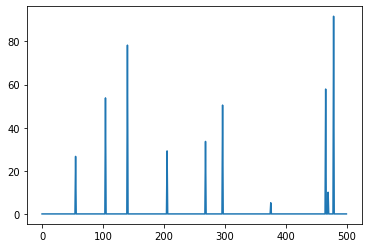

In [80]:
plt.plot(Hr[:,45])

In [128]:
net1(val_r[:,0:100].T.float())-net1(val_w[:,0:100].T.float())

tensor([[-0.9988],
        [-0.9964],
        [-0.9981],
        [-0.9907],
        [-0.9849],
        [-0.9854],
        [-0.9995],
        [-0.9589],
        [-0.9942],
        [-0.9873],
        [-0.9989],
        [-0.9914],
        [-0.9992],
        [-0.9967],
        [-1.0000],
        [-0.9997],
        [-0.9989],
        [-0.9970],
        [-0.2579],
        [-0.9686],
        [-0.9975],
        [-0.9717],
        [-0.9984],
        [-0.9940],
        [-0.9982],
        [-0.9967],
        [-0.0121],
        [-0.9996],
        [-1.0000],
        [-0.8643],
        [-0.9916],
        [-0.9998],
        [-0.9998],
        [-0.9966],
        [-0.9848],
        [-0.9999],
        [-0.0192],
        [-0.9765],
        [-0.9988],
        [-0.9331],
        [-0.9741],
        [-0.9802],
        [-0.8272],
        [-0.9985],
        [-0.9801],
        [-0.9972],
        [-0.9848],
        [-0.9996],
        [-0.9989],
        [-0.9991],
        [-0.8817],
        [-0.9934],
        [-0.

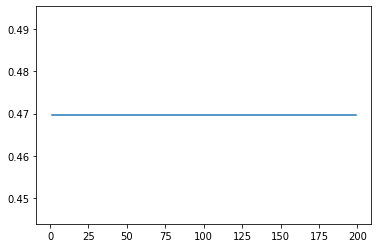

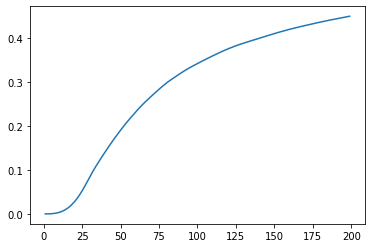

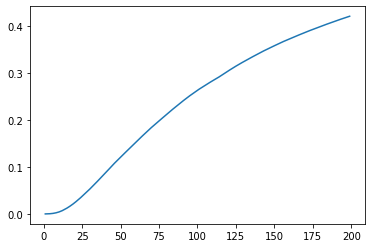

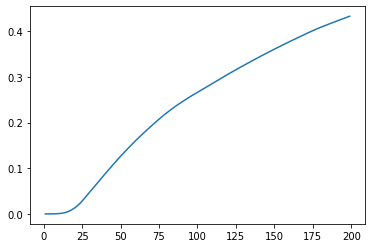

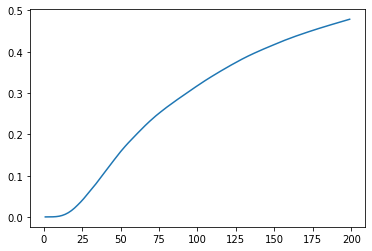

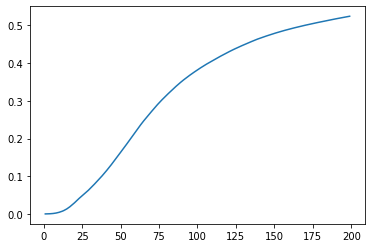

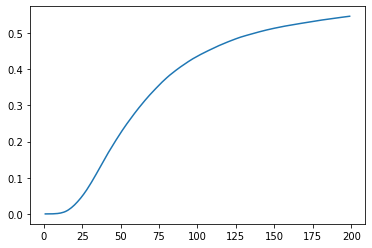

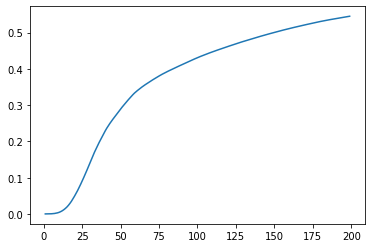

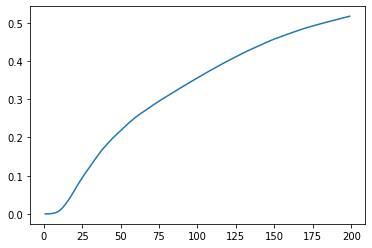

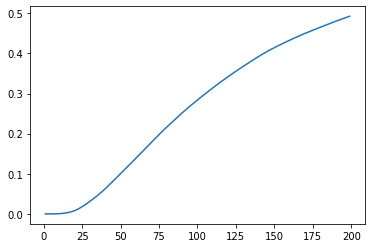

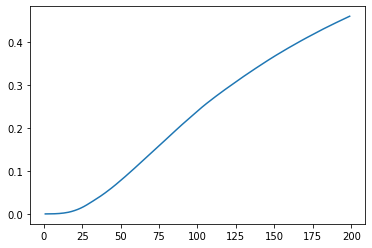

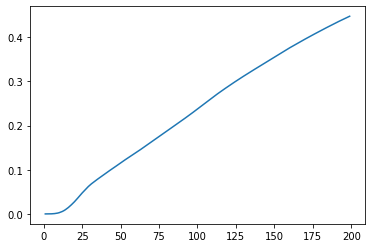

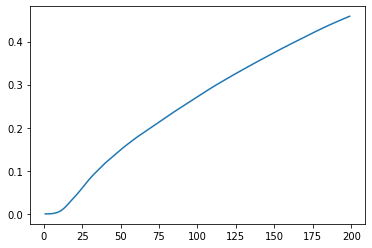

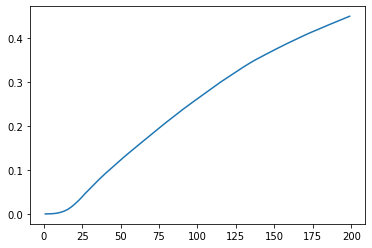

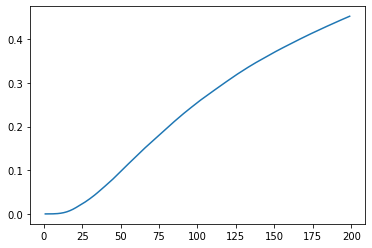

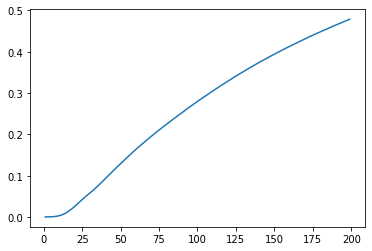

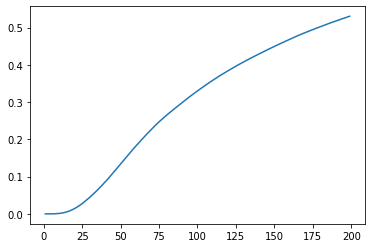

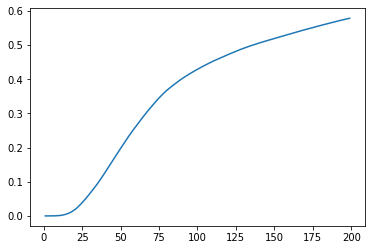

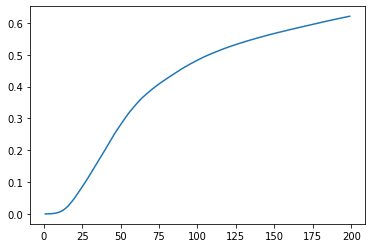

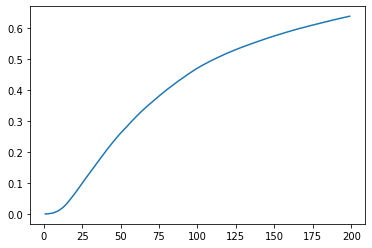

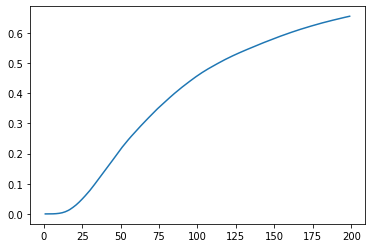

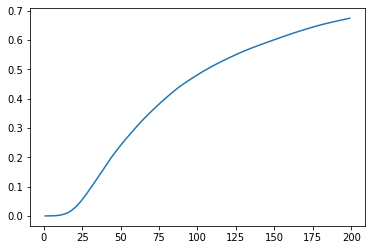

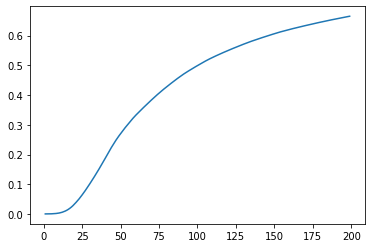

KeyboardInterrupt: 

In [130]:
#penalty with Ncount 
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
test = torch.zeros([500])
# the function that I'm going to plot
def z_func(x,rloc1,Ncount):
    test = torch.zeros([500])
    test[rloc1]=x
    Fw=torch.matrix_power(A, int(Ncount))
    meas=Fw@test
    return net1(meas.T.float()).detach().cpu().numpy()




nc = np.arange(1.0,200.0,1.0)
#y = np.arange(0.0,100.0,1.0)
#X,Y = meshgrid(x, y) # grid of point
Z= np.zeros_like(nc)
for j in range(0,500):
    for n in range (0,199):
        Z[n]=z_func(100,j,nc[n])
    plt.plot(nc,Z)
    plt.pause(0.2)

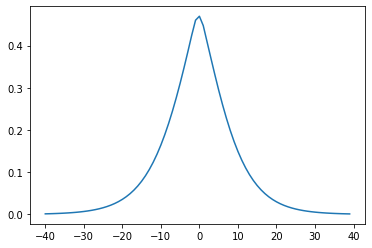

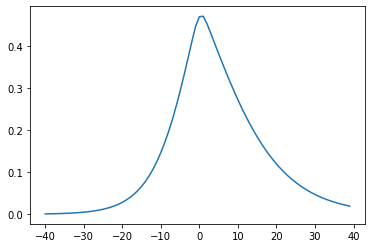

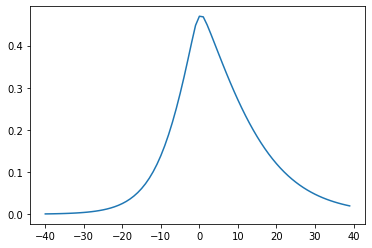

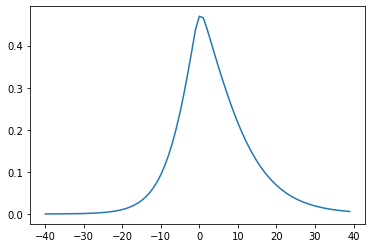

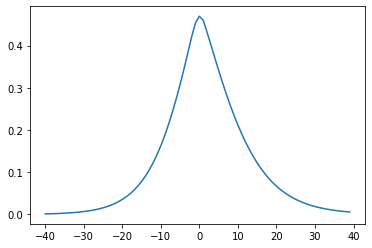

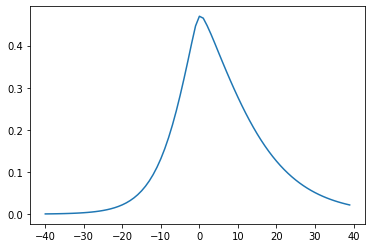

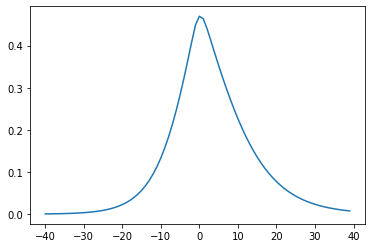

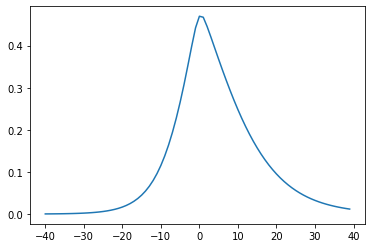

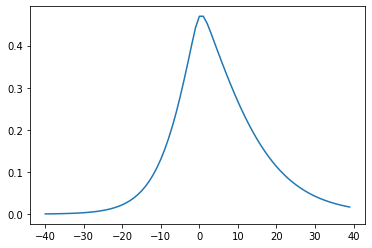

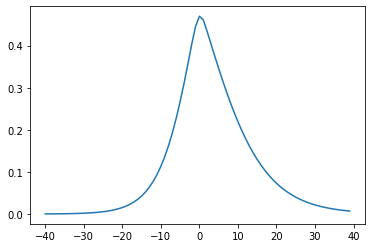

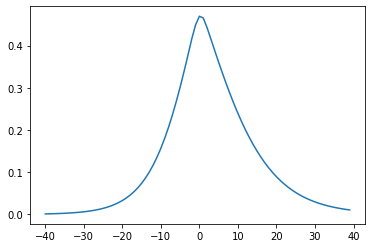

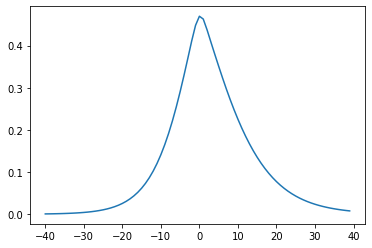

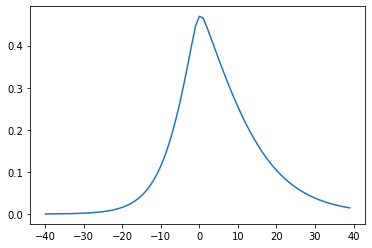

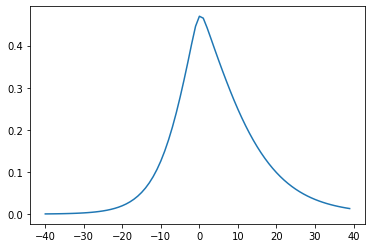

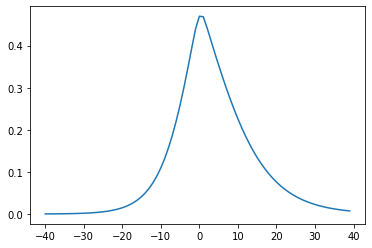

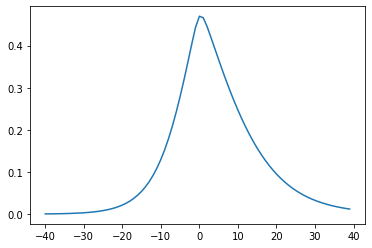

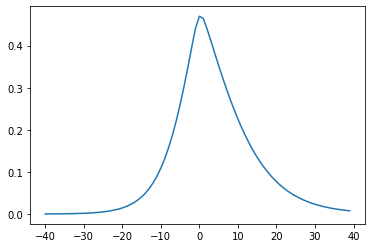

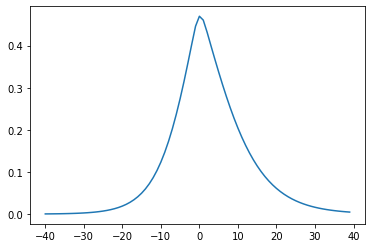

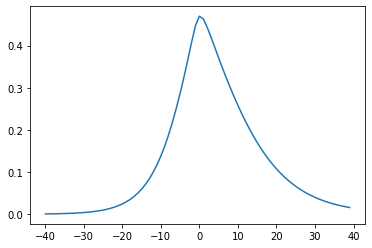

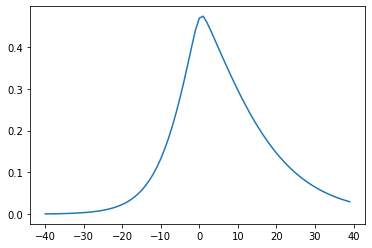

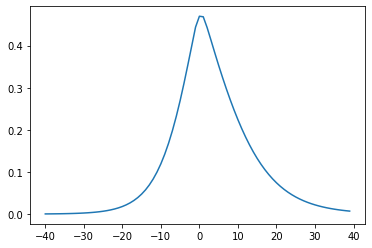

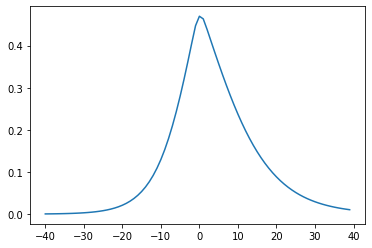

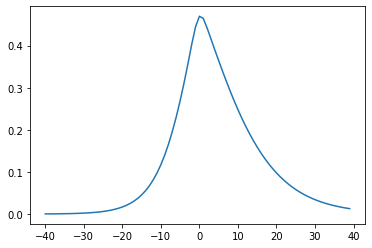

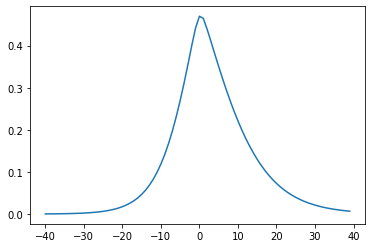

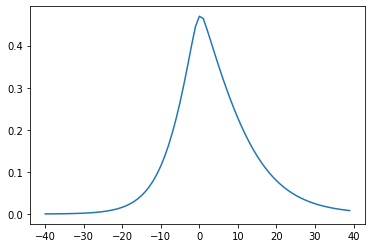

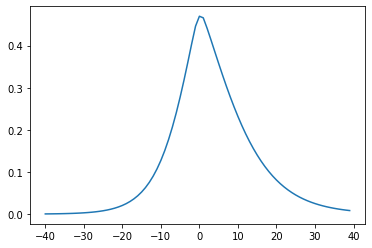

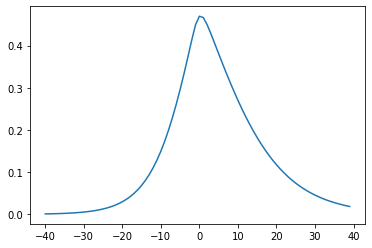

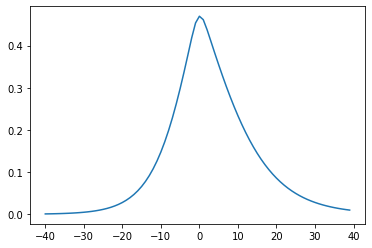

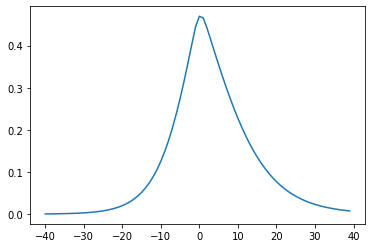

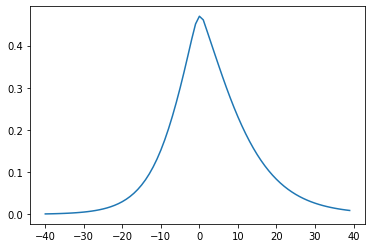

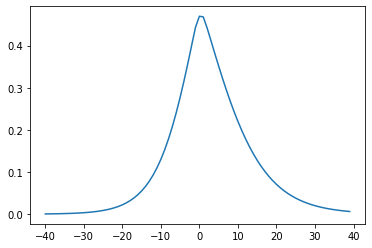

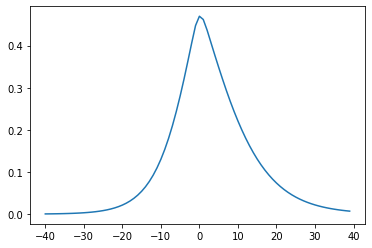

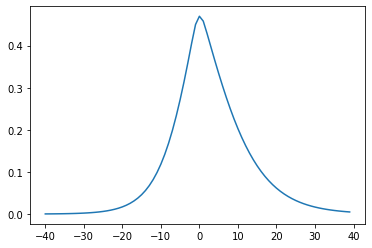

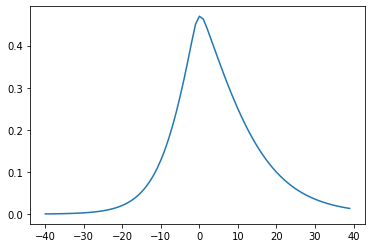

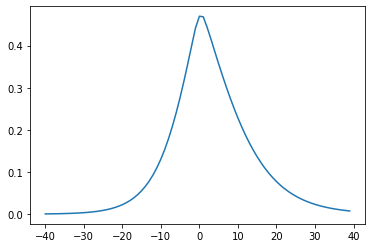

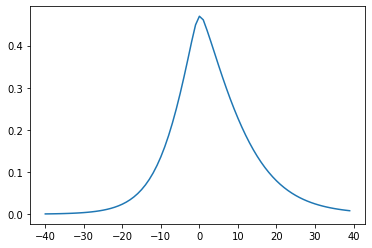

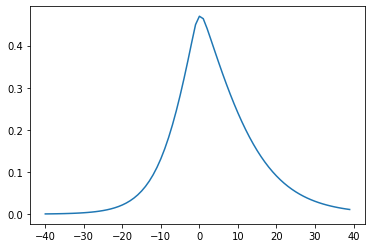

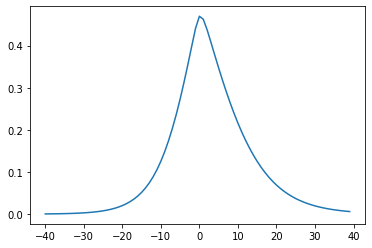

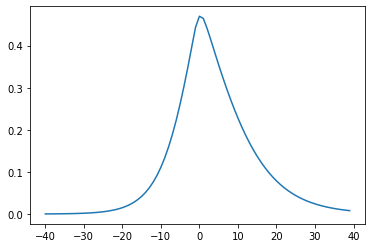

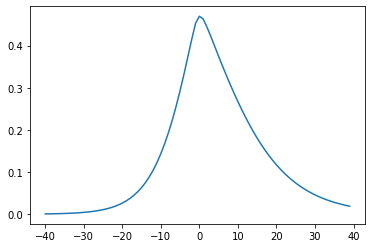

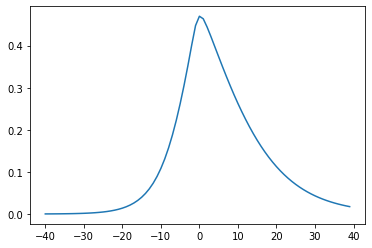

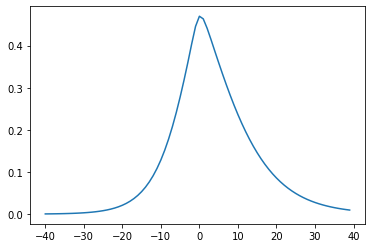

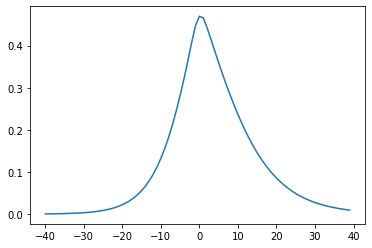

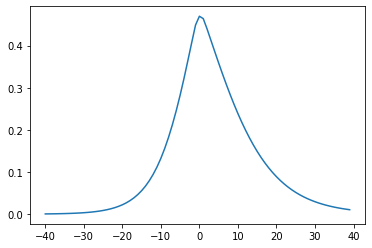

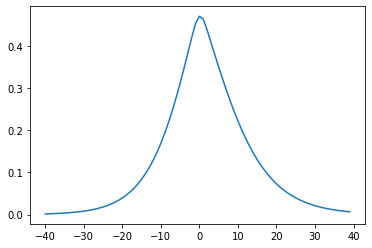

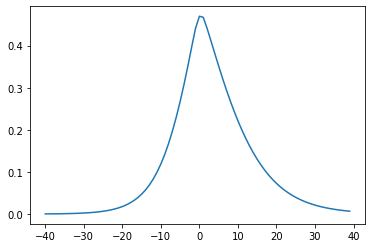

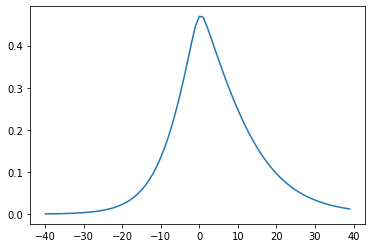

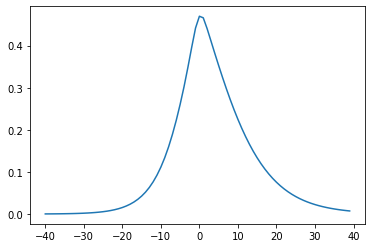

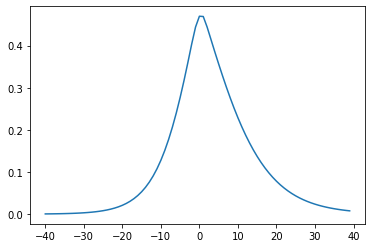

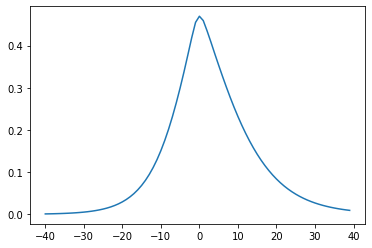

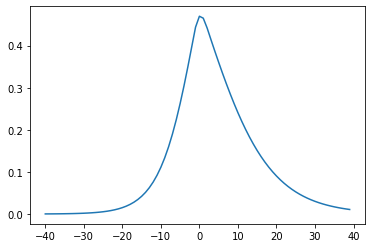

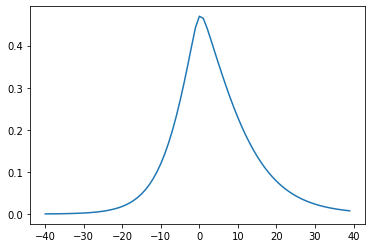

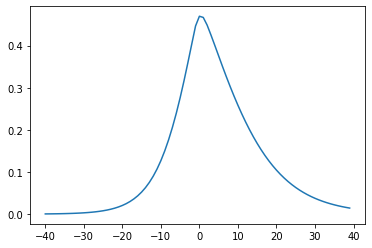

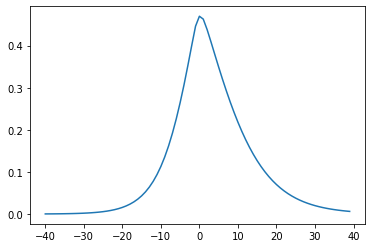

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [129]:
##penalty variation with amplitude
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
test = torch.zeros([500])
# the function that I'm going to plot
def z_func(x,rloc1):
    test = torch.zeros([500])
    test[rloc1]=x
    return net1(test.T.float()).detach().cpu().numpy()
 
x = np.arange(-40.0,40.0,1.0)
#y = np.arange(0.0,100.0,1.0)
#X,Y = meshgrid(x, y) # grid of point
Z= np.zeros_like(x)
for j in range(0,500):
    for i in range (-40,40):
        Z[i+40]=z_func(x[i+40],j)
    plt.plot(x,Z)
    plt.pause(0.2)

In [25]:
co=200*torch.ones([500])
net1(co).detach().cpu().numpy()

array([1.], dtype=float32)

In [99]:
#main problem 
import numpy as np
import torch 
from numpy.linalg import matrix_power
N=500
alpha=20
s=1/(2*alpha)
A=torch.zeros((N,N))

for i in range(1,N-1):
    A[i,i]=1-2*s
    A[i,i-1]=s
    A[i,i+1]=s

A[:,0]=0
A[:,N-1]=0
A[0,:]=0
A[N-1,:]=0
u=torch.zeros((N,1))
u[100]=100.56
u[250]=100.55
u[400]=100.44

Ncount=1000
Fw=torch.matrix_power(A, Ncount)
meas=Fw@u

In [118]:
def get_X(Ncount):
    Fw = torch.matrix_power(A, int(Ncount))
    x1 = torch.zeros((500,1))  # initial value of x
    x1.requires_grad_(True)  # turn on gradients w.r.t. x
    optimizer = torch.optim.Adam([x1], lr=8e-3)
    beta=5000
    beta1 = 100
    beta3 = 5
    for iter in range(3000):  # for N iterations...
        optimizer.zero_grad()  # zero the gradients 
        #loss = torch.sum((Fw.matmul(x1) - meas)**2) + beta3*torch.sum(torch.abs(x1))#+ beta*net1(x1.T) +beta1*torch.norm(x1[x1<0])#+ beta*net1(x1.T)#  # compute the loss
        loss = torch.sum((Fw.matmul(x1) - meas)**2) + beta*net1(x1.T) +beta1*torch.norm(x1[x1<0]) + beta3*torch.norm(x1,2) #+ beta*net1(x1.T)
        loss.backward()  # take gradients of the loss
        #print(loss.item())
        optimizer.step()  # take a gradient step (changes x!)
        #print(loss.item())
        #x1.requires_grad_(False)  # done optimizing, so turn off gradient
    print(loss.item())    
    plt.plot(x1.detach().numpy())
    plt.plot(meas)
    plt.pause(0.2)
    return x1       

def get_Ncount(p):
    Nmax=1500
    E=torch.zeros(Nmax)
    r=p
    for Nc in range(0,Nmax):
        r=A@r
        E[Nc]=torch.norm(r-meas,2)
    ind = torch.where(E==torch.min(E))[0]
    return ind

737.3092041015625


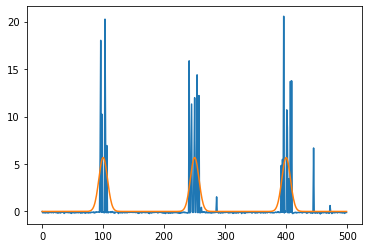

tensor([280])
737.85693359375


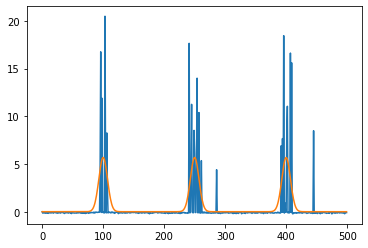

tensor([306])
736.1209106445312


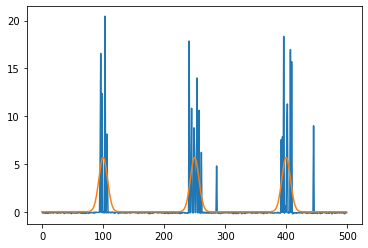

tensor([315])
735.8399658203125


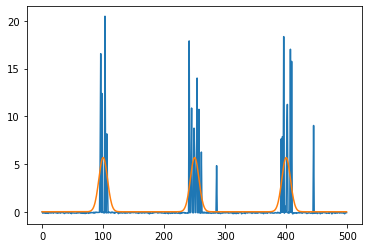

tensor([317])
735.8016357421875


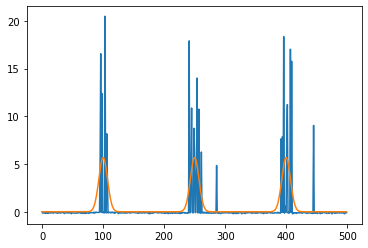

tensor([318])
735.768310546875


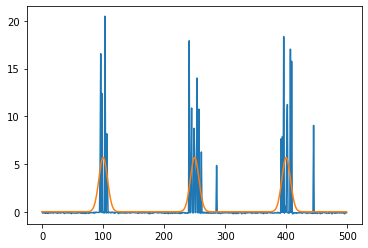

tensor([318])
735.768310546875


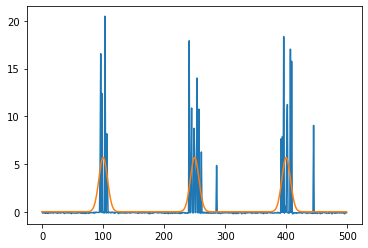

tensor([318])
735.768310546875


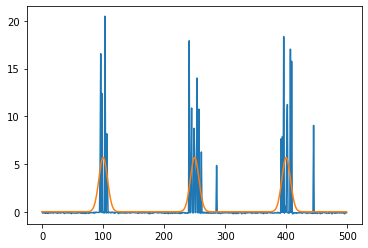

tensor([318])
735.768310546875


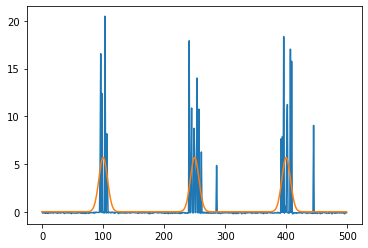

tensor([318])
735.768310546875


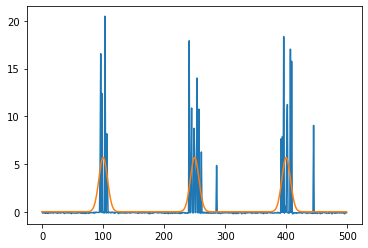

tensor([318])
735.768310546875


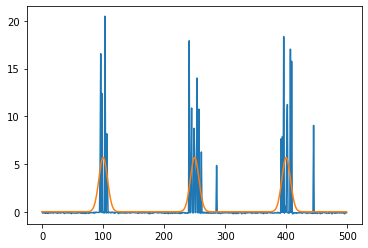

tensor([318])
735.768310546875


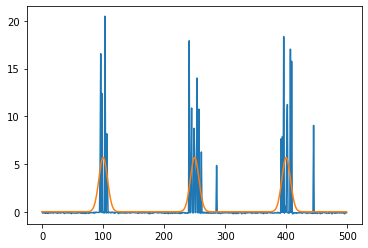

tensor([318])
735.768310546875


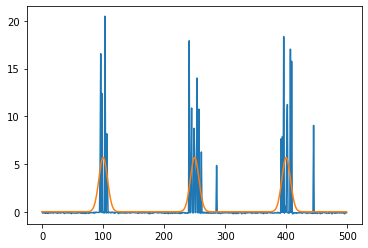

tensor([318])
735.768310546875


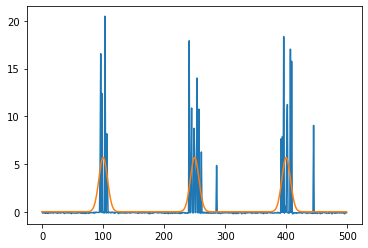

tensor([318])
735.768310546875


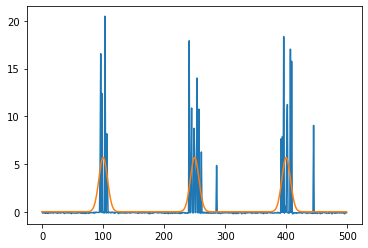

tensor([318])
735.768310546875


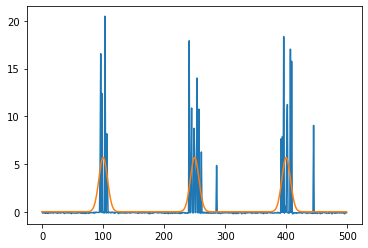

tensor([318])
735.768310546875


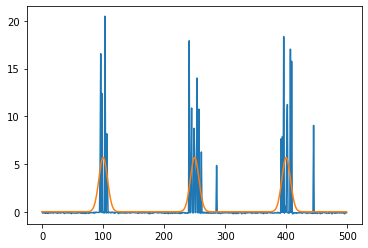

tensor([318])
735.768310546875


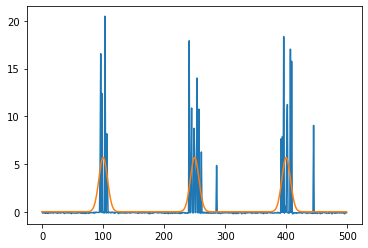

tensor([318])
735.768310546875


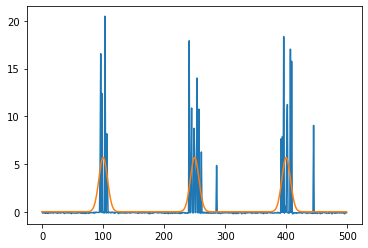

tensor([318])
735.768310546875


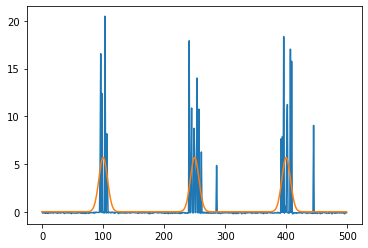

tensor([318])
735.768310546875


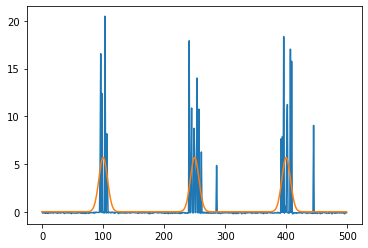

tensor([318])
735.768310546875


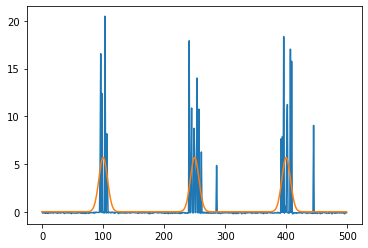

tensor([318])
735.768310546875


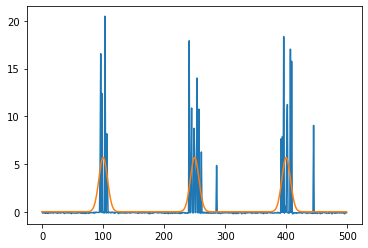

tensor([318])
735.768310546875


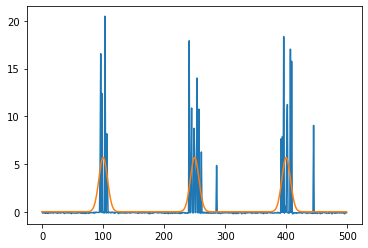

tensor([318])
735.768310546875


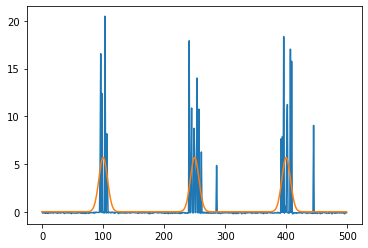

tensor([318])
735.768310546875


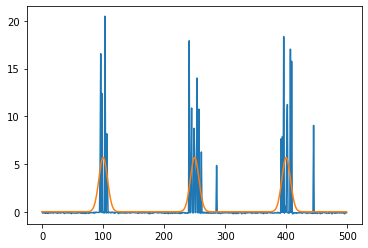

tensor([318])
735.768310546875


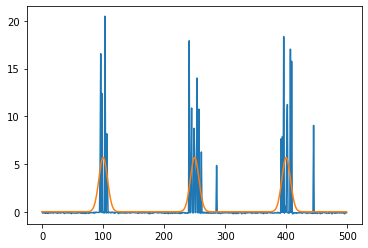

tensor([318])
735.768310546875


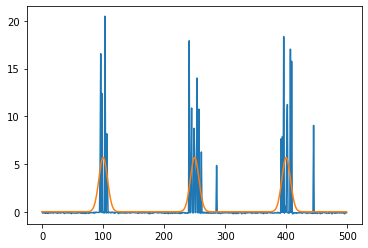

tensor([318])
735.768310546875


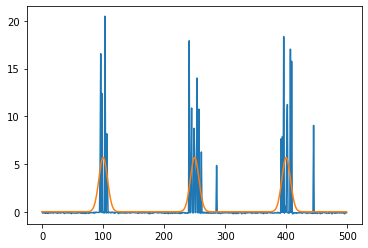

tensor([318])
735.768310546875


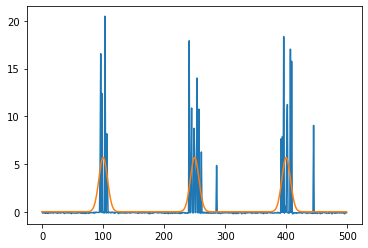

tensor([318])


In [119]:
##using network regularizer
import matplotlib.pylab as plt
N_guess=200
trials=30
Ntemp=N_guess
for i in range(0,trials):
    Ntemp = get_Ncount(get_X(Ntemp))
    print(Ntemp)
    

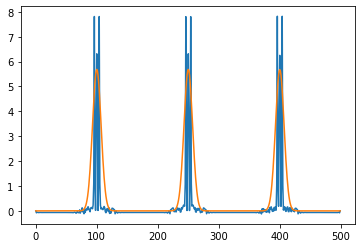

tensor([86])


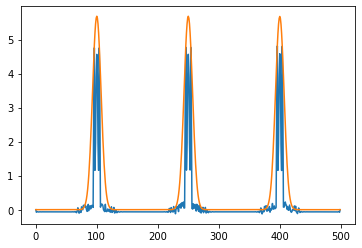

tensor([74])


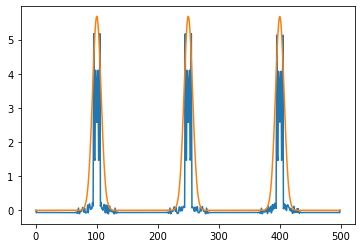

tensor([62])


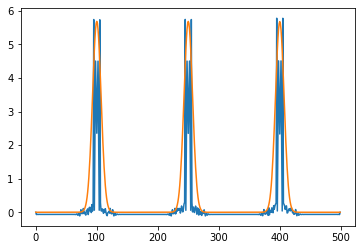

tensor([56])


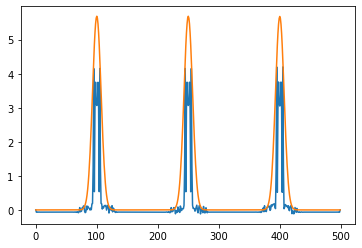

tensor([49])


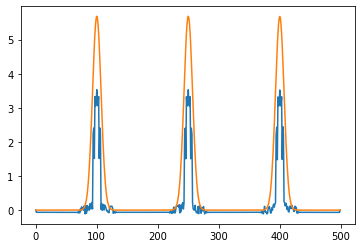

tensor([38])


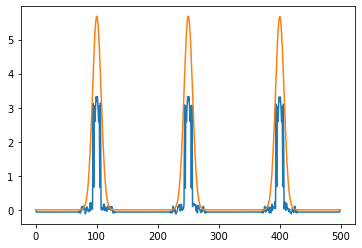

tensor([34])


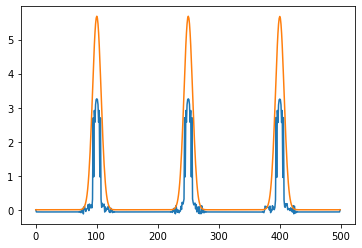

tensor([30])


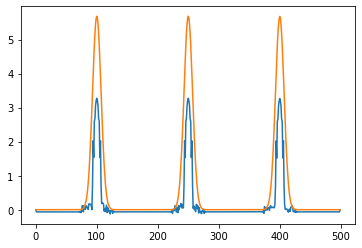

tensor([24])


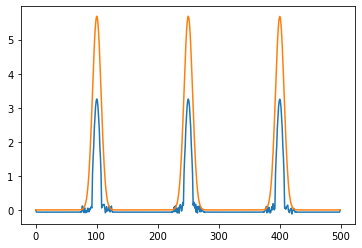

tensor([17])


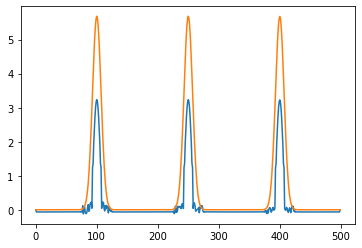

tensor([16])


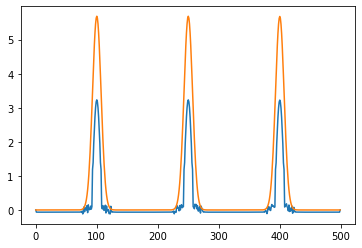

tensor([16])


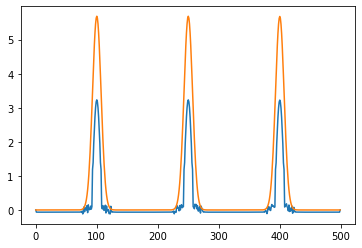

tensor([16])


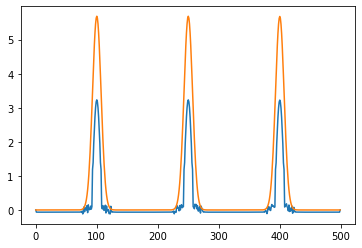

tensor([16])


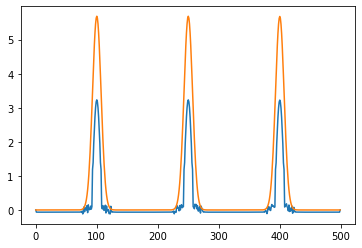

tensor([16])


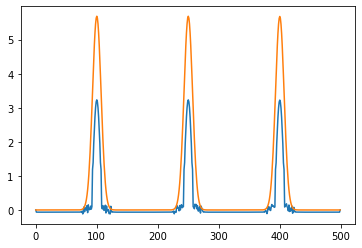

tensor([16])


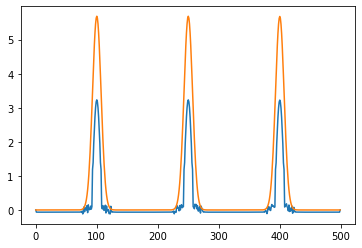

tensor([16])


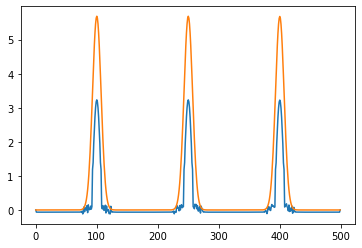

tensor([16])


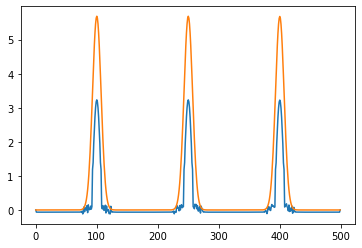

tensor([16])


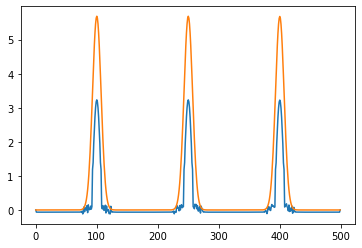

tensor([16])


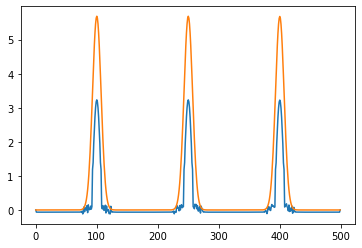

tensor([16])


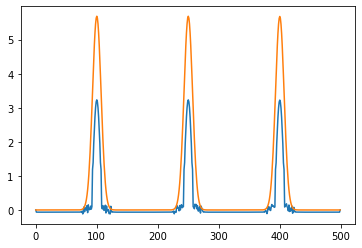

tensor([16])


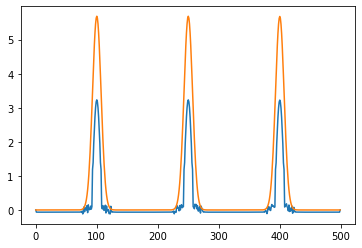

tensor([16])


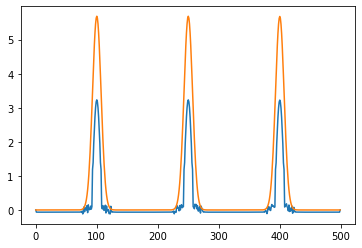

tensor([16])


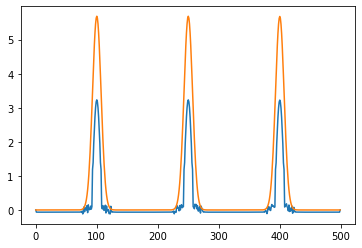

tensor([16])


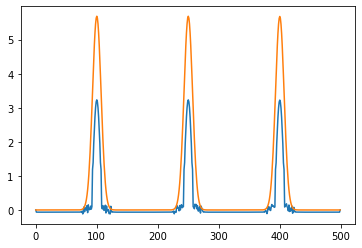

tensor([16])


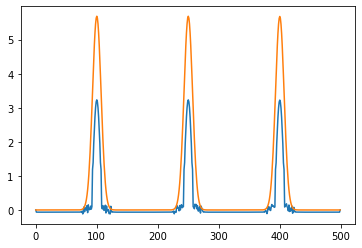

tensor([16])


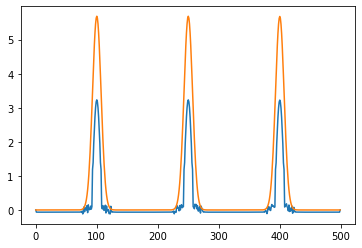

tensor([16])


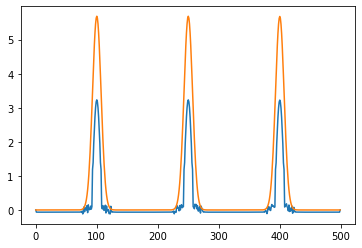

tensor([16])


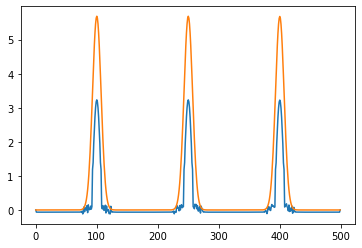

tensor([16])


In [23]:
##using l1 regularizer
import matplotlib.pylab as plt
N_guess=100
trials=30
Ntemp=N_guess
for i in range(0,trials):
    Ntemp = get_Ncount(get_X(Ntemp))
    print(Ntemp)

In [6]:
net1.fc1.weight.data

tensor([[-2.7450e-02, -4.1180e-02, -3.0497e-02,  ...,  1.0672e-02,
          1.4176e-02,  1.1342e-02],
        [ 2.7899e-02, -1.3191e-02, -2.2829e-05,  ..., -4.1024e-02,
         -3.6656e-02,  2.3245e-02],
        [ 2.8349e-02, -4.2043e-02, -4.0952e-02,  ...,  3.6522e-02,
          4.2786e-02, -2.0775e-02],
        ...,
        [ 1.2602e-02, -3.0946e-02,  3.5957e-03,  ...,  7.2174e-03,
         -3.2091e-02,  4.2991e-02],
        [-8.8010e-03, -2.1227e-02, -2.8805e-02,  ..., -3.6952e-02,
         -9.0410e-04,  2.1080e-02],
        [-2.5725e-02, -3.1161e-02,  2.1738e-02,  ...,  1.3501e-03,
         -3.1137e-02, -1.1848e-02]])

In [15]:
import cvxpy as cp

# Create variable.
x_l1 = cp.Variable(shape=(N,1))
eps=0.1  ##box constraint
# Create constraint.
#constraints = [Fw*x_l1 =  meas]
constraints = [cp.norm(Fw*x_l1-meas, 2) <=eps]


# Form objective.
obj = cp.Minimize(cp.norm(x_l1, 1))

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()
print("status: {}".format(prob.status))


# Number of nonzero elements in the solution (its cardinality or diversity).
nnz_l1 = (np.absolute(x_l1.value) > 0.01).sum()
print('Found a feasible x in R^{} that has {} nonzeros.'.format(N, nnz_l1))
print("optimal objective value: {}".format(obj.value))

C:\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


status: optimal
Found a feasible x in R^500 that has 3 nonzeros.
optimal objective value: 301.06508890425897


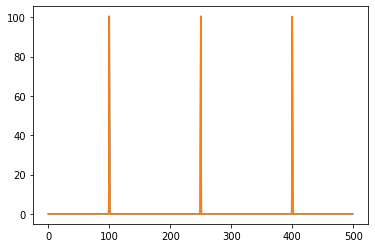

In [22]:
import matplotlib.pylab as plt
plt.plot(u)
plt.plot(x_l1.value)